This notebook focuses on building a simple linear regression to predict honey production in 2050 based on data collected between 1998 and 2012.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
honey = pd.read_csv('honeyproduction.csv')

honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [5]:
honey.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [7]:
honey.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [12]:
#Mean of totalprod per year

prod_per_year = honey.groupby('year').totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [14]:
#Create a variable called X that is the column of years in this prod_per_year dataframe.

X = prod_per_year.year

#Reshape into 1D column

X = X.values.reshape(-1,1)

In [16]:
#Create a variable called y that is the totalprod column in the prod_per_year dataframe.

y = prod_per_year.totalprod

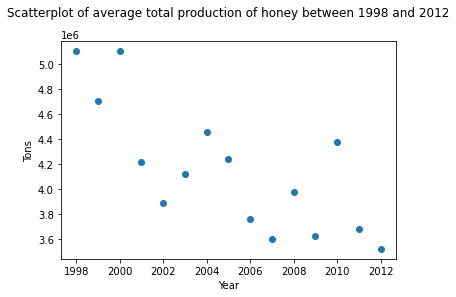

In [23]:
#Plot a scatterplot of y vs X

plt.scatter(X,y)
plt.title('Scatterplot of average total production of honey between 1998 and 2012', pad=25)
plt.xlabel('Year')
plt.ylabel('Tons')
plt.show()

## Create and Fit a Linear Regression Model

In [30]:
#Create a linear regression model from scikit-learn

regr = linear_model.LinearRegression()

#Fit the model to the data
regr.fit(X,y)

#Print out the slope of the line
print(regr.coef_[0])

#Print out the intercept of the line
print(regr.intercept_)

-88303.18915238195
181208083.10732982


In [31]:
#Create a list called y_predict that is the predictions your regr model would make on the X data

y_predict = regr.predict(X)

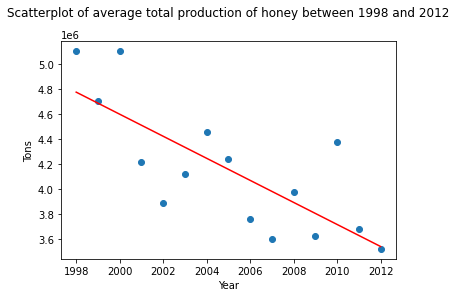

In [33]:
#Plot y_predict vs X as a line

plt.scatter(X,y)
plt.plot(X, y_predict, color='red')
plt.title('Scatterplot of average total production of honey between 1998 and 2012', pad=25)
plt.xlabel('Year')
plt.ylabel('Tons')
plt.show()

## Predict the Honey Decline 

In [37]:
#Create a list of 10 numbers that is the range between 2013 (last year of the dataset) and 2050.

X_future = np.array(range(1, 11))
print(X_future)

#Reshape it in a 1D array.
X_future = X_future.reshape(-1, 1)
print(X_future)

[ 1  2  3  4  5  6  7  8  9 10]
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [38]:
#Create a list called future_predict that is the y-values that your regr model would predict for the values of X_future.

future_predict = regr.predict(X_future)

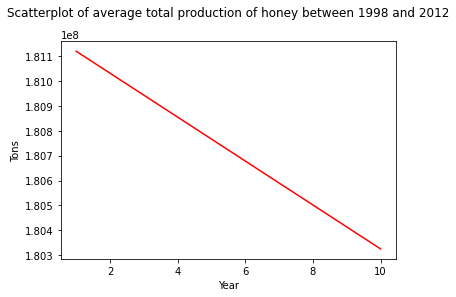

In [39]:
#Plot future_predict vs X_future.
plt.plot(X_future, future_predict, color='red')
plt.title('Plot of average total production of honey between 2013 and 2050', pad=25)
plt.xlabel('Year')
plt.ylabel('Tons')
plt.show()

It seems like by 2050, the average honey production will be 1,803e8 tons per year